In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

# Reading Data

In [2]:
phone= pd.read_csv('Mobile phone price.csv')

In [3]:
phone.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


# Data Cleaning

In [4]:
phone.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

In [5]:
phone.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

<Axes: >

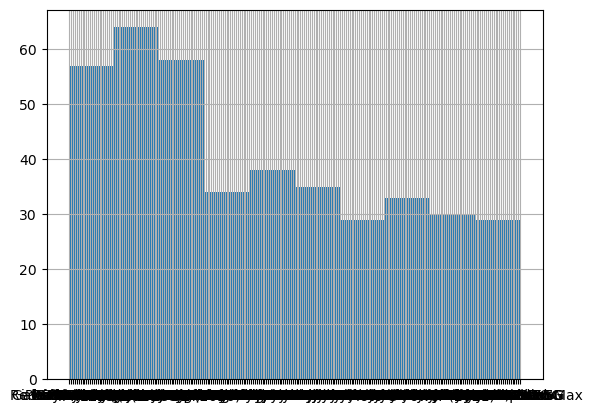

In [6]:
phone['Model'].hist()

In [7]:
model_frequency = phone['Model'].value_counts()
print(model_frequency)

Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: Model, Length: 239, dtype: int64


In [8]:
#dimensionality reduction due to over spread,name doesn't make significat difference
phone.drop('Model', axis=1, inplace=True)
phone.head()

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [9]:
phone.columns

Index(['Brand', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [10]:
#clean column names
new_col_names ={
               'Storage ': 'Storage',
               'RAM ': 'RAM',
               'Screen Size (inches)': 'Screen',
               'Camera (MP)': 'Camera',
               'Battery Capacity (mAh)':'Battery',
               'Price ($)': 'Price'}
phone.rename(columns = new_col_names, inplace=True)
phone.head()

,Brand,Storage,RAM,Screen,Camera,Battery,Price
0,Apple,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [11]:
Storage_frequency = phone['Storage'].value_counts()
print(Storage_frequency)

128GB     125
128        74
128 GB     51
64GB       49
32GB       27
256        23
64         18
64 GB      16
256GB      10
256 GB      7
32 GB       3
512         3
32          1
Name: Storage, dtype: int64


In [12]:
phone['Storage']=phone['Storage'].astype(str).str.replace('GB','').str.replace(' GB','').astype(int)

In [13]:
ram_frequency = phone['RAM'].value_counts()
print(ram_frequency)

4GB      68
6GB      59
8GB      42
4        35
8        34
6        28
4 GB     25
3GB      22
6 GB     20
8 GB     19
12       11
12GB      9
2GB       9
3         9
3 GB      7
12 GB     5
5GB       2
2 GB      1
16        1
2         1
Name: RAM, dtype: int64


In [14]:
phone['RAM'] = phone['RAM'].astype(str).str.replace('GB','').str.replace(' GB','').astype(int)

In [15]:
phone['Screen'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [16]:
#remove two outliares
phone = phone[phone['Screen'] != '7.6 (unfolded)']
phone = phone[phone['Screen'] != '6.8 + 3.9']

In [17]:
phone['Screen'] = phone['Screen'].astype(float)

In [18]:
cam_freq = phone['Camera'].value_counts()
print(cam_freq)

13MP + 2MP + 2MP          29
48MP + 8MP + 2MP + 2MP    16
48+8+2+2                  13
64MP + 8MP + 2MP          11
13MP + 2MP                11
                          ..
48MP + 8MP + 5MP + 5MP     1
50MP + 5MP                 1
50 + 8 + 2                 1
48 + 8 + 5                 1
48+13+8+2                  1
Name: Camera, Length: 142, dtype: int64


In [19]:
phone['Camera'].unique()


array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 12MP + 8MP', '13MP + 5MP',
       '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP + 8MP + 2MP',
       '

In [20]:
phone['Camera'] = phone['Camera'].astype(str).str.replace(' ','')

In [21]:
phone['Camera'] = phone['Camera'].str.replace('MP','').str.replace('D','').str.replace('ToF','0')

In [22]:
phone['Camera'].unique()

array(['12+12+12', '108+10+10+12', '48+50+8+2', '64+8+5+2', '50+12.2',
       '12+12', '48+8+2+2', '50+13+16+2', '50+48+12+8', '64+8+2',
       '64+12+5+5', '50+50+13+3', '64+8+5', '64+12+12', '50+2+2',
       '48+2+2', '50+8+2+2', '48+5', '48+50+2', '108+8+5+2', '13+2+2',
       '13+2', '12', '48+5+2', '50+8+2', '64+8+2+2', '48+8+5', '64+8',
       '48+5+2+2', '50+2', '64+12+8+5', '64+2', '48+13+13', '50+12',
       '50+16+13+2', '108+16+8', '48+13', '64+12+8', '13+5', '108+8+2',
       '64+5+2+2', '64+12', '48+50+8', '50+48+48', '8+2', '12+12+8',
       '64+13+5', '12+13', '64+8+5+5', '48+8+2', '48+2', '108+12+10+10',
       '50+5', '48+8+5+5', '108+8+2+2', '13', '48+8+5+2', '13+5+2', '8',
       '13+5+2+2', '13+8+5+2', '13+8+2+2', '12+2+2', '13+8+2', '25+8+5',
       '108+12+12', '12.2+16', '50+20+12+3', '64+12+2+2', '108+13+5',
       '48+16+5+2', '12+7', '50+12+40+3', '50+8+16+2', '48+12+5',
       '48+48+8+5', '40+40+8+3', '48+12+13', '40+20+8+0', '48+16+8',
       '16+8+5', '16+

In [23]:
phone['Camera'].value_counts()

13+2+2       41
48+8+2+2     36
48+2+2       18
64+12+5+5    18
64+8+2+2     17
             ..
13+8+2+2      1
108+16+8      1
13+8+2        1
25+8+5        1
48+13+8+2     1
Name: Camera, Length: 90, dtype: int64

In [24]:
#function to get entries sum
def sum_camera_mps(entry):
    numbers = entry.split('+')
    return np.sum([float(num) for num in numbers])

# Apply the function to the 'Camera (MP)' column and create a new column 'Sum_Camera_MPs'
phone['CamPixels'] = phone['Camera'].apply(sum_camera_mps)

In [25]:
phone.head()

,Brand,Storage,RAM,Screen,Camera,Battery,Price,CamPixels
0,Apple,128,6,6.10,12+12+12,3095,999,36.0
1,Samsung,256,12,6.80,108+10+10+12,5000,1199,140.0
2,OnePlus,128,8,6.70,48+50+8+2,4500,899,108.0
3,Xiaomi,128,6,6.67,64+8+5+2,5020,279,79.0
4,Google,128,8,6.40,50+12.2,4614,799,62.2


In [26]:
phone.drop('Camera',axis=1, inplace=True)

In [27]:
phone.head()

,Brand,Storage,RAM,Screen,Battery,Price,CamPixels
0,Apple,128,6,6.10,3095,999,36.0
1,Samsung,256,12,6.80,5000,1199,140.0
2,OnePlus,128,8,6.70,4500,899,108.0
3,Xiaomi,128,6,6.67,5020,279,79.0
4,Google,128,8,6.40,4614,799,62.2


In [28]:
phone['Price'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '119', '319', '1049'],
      dtype=object)

In [29]:
phone['Price']= phone['Price'].astype(str).str.replace('$','').str.replace(',','').astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11300\3853147976.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phone['Price']= phone['Price'].astype(str).str.replace('$','').str.replace(',','').astype(int)


In [30]:
phone['CamPixels'].unique()

array([ 36. , 140. , 108. ,  79. ,  62.2,  24. ,  60. ,  81. , 118. ,
        74. ,  86. , 116. ,  77. ,  88. ,  54. ,  52. ,  62. ,  53. ,
       100. , 123. ,  17. ,  15. ,  12. ,  55. ,  76. ,  61. ,  72. ,
        57. ,  89. ,  66. , 132. ,  84. ,  18. ,  73. , 106. , 146. ,
        10. ,  32. ,  82. ,  25. ,  58. ,  50. , 120. ,  13. ,  63. ,
        20. ,   8. ,  22. ,  28. ,  16. ,  23. ,  38. ,  28.2,  85. ,
        80. , 126. ,  71. ,  19. , 105. ,  65. , 109. ,  91. ,  68. ,
        29. ,  34. , 171. ,  75. , 168.3])

In [31]:
phone.dtypes

Brand         object
Storage        int32
RAM            int32
Screen       float64
Battery        int64
Price          int32
CamPixels    float64
dtype: object

# Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [33]:
brand_encoder = LabelEncoder()

In [34]:
phone['Brand'].value_counts()

Samsung       78
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
Blackberry     3
LG             2
Sony           1
CAT            1
Name: Brand, dtype: int64

In [35]:
#removing brands with low frequency to minimize least square
phone=phone[phone['Brand'] !='Google']
phone=phone[phone['Brand'] !='Asus']
phone=phone[phone['Brand'] !='Blackberry']
phone=phone[phone['Brand'] !='LG']
phone=phone[phone['Brand'] !='Sony']
phone=phone[phone['Brand'] !='CAT']

In [36]:
phone['Brand'].value_counts()

Samsung     78
Xiaomi      67
Oppo        56
Realme      43
Vivo        35
Apple       30
Nokia       28
Motorola    23
OnePlus     15
Huawei      12
Name: Brand, dtype: int64

In [37]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 406
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      387 non-null    object 
 1   Storage    387 non-null    int32  
 2   RAM        387 non-null    int32  
 3   Screen     387 non-null    float64
 4   Battery    387 non-null    int64  
 5   Price      387 non-null    int32  
 6   CamPixels  387 non-null    float64
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 19.7+ KB


In [38]:
phone.shape

(387, 7)

In [39]:
phone['codeBrand'] = brand_encoder.fit_transform(phone['Brand'])

In [40]:
phone.head()

,Brand,Storage,RAM,Screen,Battery,Price,CamPixels,codeBrand
0,Apple,128,6,6.10,3095,999,36.0,0
1,Samsung,256,12,6.80,5000,1199,140.0,7
2,OnePlus,128,8,6.70,4500,899,108.0,4
3,Xiaomi,128,6,6.67,5020,279,79.0,9
5,Apple,128,4,6.10,2815,799,24.0,0


In [41]:
phone.drop('Brand',axis=1, inplace=True)

In [42]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 406
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Storage    387 non-null    int32  
 1   RAM        387 non-null    int32  
 2   Screen     387 non-null    float64
 3   Battery    387 non-null    int64  
 4   Price      387 non-null    int32  
 5   CamPixels  387 non-null    float64
 6   codeBrand  387 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 18.1 KB


# Data Spliting

In [43]:
X=phone.drop('Price',axis=1)
Y=phone['Price']

In [44]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

# Fit Linear Regression Model

In [45]:
linear = LinearRegression()

In [46]:
linear.fit(X_train,Y_train)

LinearRegression()

In [47]:
linear.score(X_train,Y_train)

0.7211175576505788

In [48]:
linear.score(X_test,Y_test)

0.7950279448881193

# Fit Ridge Regression Model

In [49]:
ridg = Ridge()
ridg.fit(X_train, Y_train)

Ridge()

In [50]:
ridg.score(X_train, Y_train)

0.7210842696560107

In [51]:
ridg.score(X_test, Y_test)

0.7937191496535485

# Fit Random Forest Regressor

In [52]:
rfr =RandomForestRegressor()

In [53]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [54]:
rfr.score(X_train, Y_train)

0.9808411092234205

In [55]:
rfr.score(X_test,Y_test)

0.8827401385913711

In [73]:
import joblib
import pickle

In [74]:
pickle.dump(rfr, open("mobile_phone_price.pkl",'wb'))


In [76]:
rfr_model = pickle.load(open('mobile_phone_price.pkl','rb'))

In [77]:
rfr_model.score(X_test, Y_test)

0.8827401385913711

# Getting price with given specifications

In [78]:
input_data = {
    'Storage':128,
    'RAM':6,
    'Screen':6.5,
    'Battery':4500,
    'CamPixels':60,
    'codeBrand':1
}

In [79]:
input1 = pd.DataFrame([input_data])

In [80]:
price = rfr_model.predict(input1)

In [81]:
print( price)

[541.56416667]


In [82]:
Estimated_Price = price[0]

In [83]:
print(Estimated_Price)

541.5641666666667
